# EDS-220 Homework 4: False Color Imagery 
### By Amanda Overbye

Github [link](https://github.com/Aoverbye/eds220-hwk4)

Github URL: https://github.com/Aoverbye/eds220-hwk4

### About
This notebook is about using false color imagery to see the impact the 2017 Thomas Fire had in Santa Barbara County. The notebook features data from Microsofts Landsat Collection 2 Level-2 satellite imagery. This data includes geographic information and atmospherically corrected surface reflectance and surface temperatures from the Landsat satellite missions.

The second dataset featured in this notebook is from Californias CAL FIRE. It originated from the California Fire Perimeters (all) dataset and has been filtered to only include data about the 2017 Thomas Fire.

#### Purpose:

The Purpose of this notebook is to demestrate how to implement false color imagery in python.

#### Highlights: 
- Utilizing the `squeeze()` and `drop_vars` functions to create usable data
- Creating and plotting a "true" color RGB image 
- Working with the `robust` parameter
- Creating an image highlighting shortwave infrared, near-infrared, and red false colors to better view the impacts of the 2017 Thomas Fire

#### References

Landsat Collection 2 Level-2: Microsoft. (2024). Landsat Collection 2 Level-2. Microsoft Planetary Computer. Accessed 11/23/2024, from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2


California Fire Perimeters (all): CAL FIRE. (2023, May 14). California Fire Perimeters (all). U.S. Department of the Interior. Accessed 11/23/2024, from https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

### Import Libraries and Read In Data

In [1]:
# Import Libraries
import pandas as pr 
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

In [2]:
# Define the file path to the Landsat data file
fp = os.path.join('/courses/EDS220/data/hwk4_landsat_data/landsat8-2018-01-26-sb-simplified.nc')

# Open the Landsat dataset using rioxarray
landsat = rioxr.open_rasterio(fp)

In [3]:
# Define the file path to the Thomas Fires data
fp = os.path.join('/', 'Users', 'overbye', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data', 'thomas_fire.geojson')

# Read the file for the Thomas Fire dataset using GeoPandas
thomas_fire = gpd.read_file(fp)


### Preliminary Data Exploration

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    green        (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    blue         (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nir08        (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    swir22       (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    red      (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    green    (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    blue     (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nir08    (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

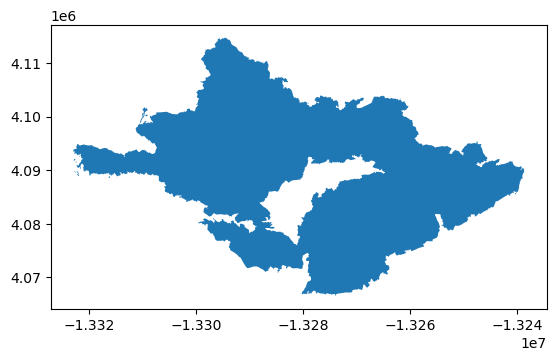

In [10]:
# Print to get a general overview of the landsat data
print(landsat)

# Print the available data variables within the dataset for further exploration
print(landsat.data_vars)

# Print thomas_fire to get a general overview of the Thomas Fire data
print(thomas_fire)

# Plot the Thomas Fire to see the shape
thomas_fire.plot()

# View the CRS for the thomas fire
print(thomas_fire.crs)

### Drop The Band Dimension For Landsat

In [5]:
# Remove extra dimensions
landsat = landsat.squeeze()

# Drop 'band'
landsat = landsat.drop_vars('band')

### Plotting the True Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


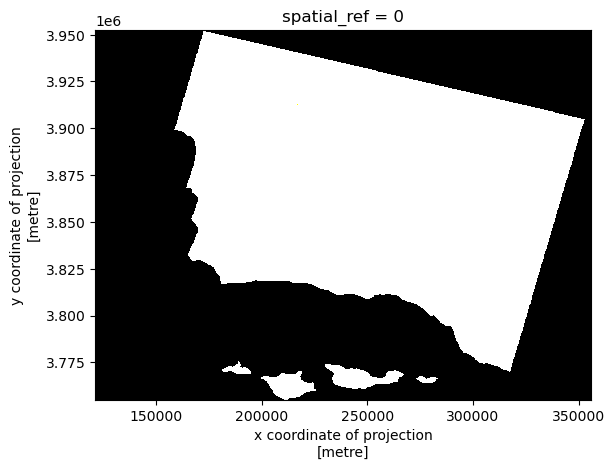

In [17]:
# Select the red, green, and blue bands from the Landsat dataset
# Convert the selected bands into an array format for visualization
# Plot the RGB data as an image to visualize the true color representation of the area
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

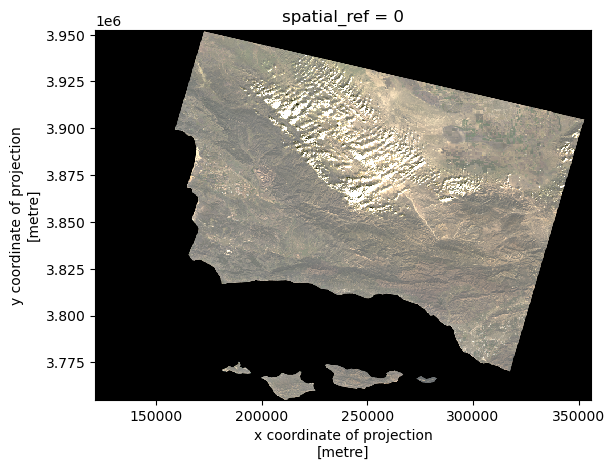

In [7]:
# Select 'red' 'green' and 'blue' bands
# Convert to a NumPy array using .to_array()
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

### Plotting The False Color Image

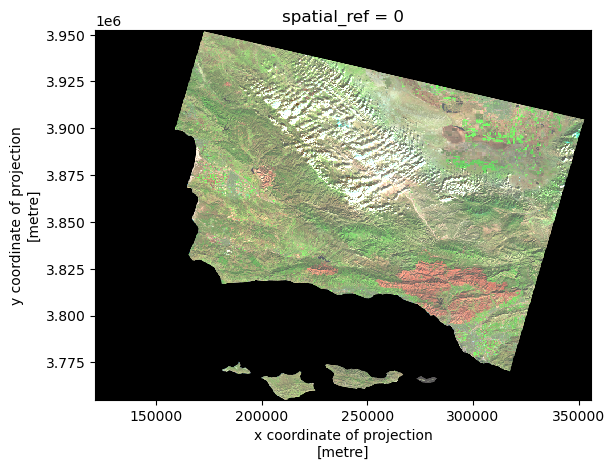

In [8]:
# Select SWIR, NIR, and Red bands and plot false color image
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

In [13]:
# Check if thomas_fire and Landsat have matching CRSs
print("Landsat CRS:", landsat.rio.crs)
print("Thomas Fire CRS:", thomas_fire.crs)

# Reproject thomas_fire to match the CRS of the landsat data if they do not match
if thomas_fire.crs != landsat.rio.crs:
    thomas_fire = thomas_fire.to_crs(landsat.rio.crs)

Landsat CRS: EPSG:32611
Thomas Fire CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


## The Final Map

The map shown below is the false color map of Santa Barbara with the Thomas Fire perimeter overlayed. The false color image highlights the impact the fire had in the area.

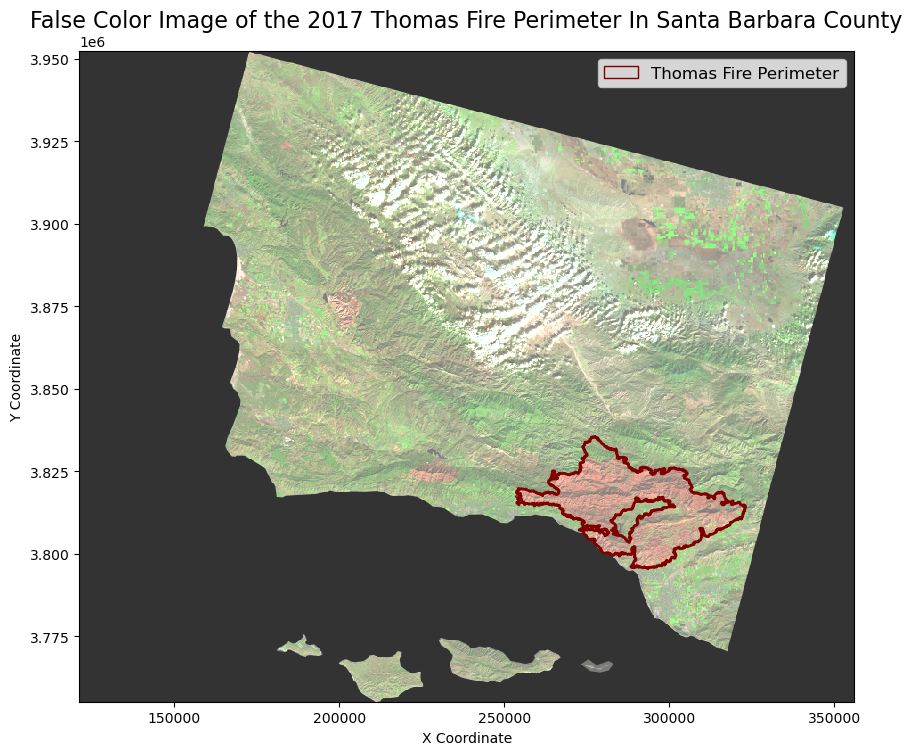

In [16]:
# Plot False Color Image
fig, ax = plt.subplots(figsize=(10, 10))
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax=ax, 
                                                           robust=True, 
                                                           alpha=0.8)

# Plot Thomas Fire perimeter
thomas_fire.plot(ax=ax, 
                       edgecolor='maroon', 
                       facecolor='none', 
                       linewidth=2)

# Create a custom legend
fire_legend = mpatches.Patch(edgecolor='maroon', 
                             facecolor='none', 
                             label="Thomas Fire Perimeter")

# Add legend manually
ax.legend(handles=[fire_legend], 
          loc="upper right", 
          fontsize=12)

# Label the map
ax.set_title("False Color Image of the 2017 Thomas Fire Perimeter In Santa Barbara County", fontsize=16)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")

plt.show()

In the false color map, we are able to see more subtle difference in the topographcy. Because newly burned land reflects well in SWIR bands, we are also able to see the impact the Thomas Fire had on the area of the burn, and how that compares to the parimeter from the CAL FIRE data.


References

Riebeek, R. (2014, March 4). Why is that Forest Red and that cloud blue?. NASA. https://earthobservatory.nasa.gov/features/FalseColor 